
### Experimentation with NN in PyTorch

Based on [this article](https://towardsdatascience.com/build-a-simple-neural-network-using-pytorch-38c55158028d).

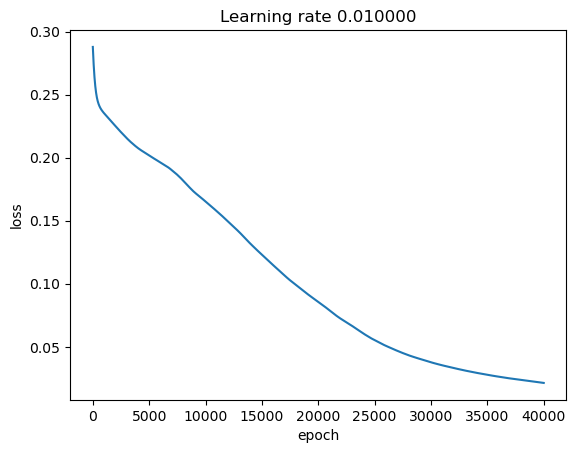

In [4]:
# Import libraries
import torch 
import torch.nn as nn

# Prepare data
# In this case, some random data
# Input size, hidden layers amount, output size, batch size, learning rate
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

# Input data is randomly generated tensor, with the input and batch size as arguments
data_x = torch.randn(batch_size, n_input)
# Output data is also randomly generated
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

# Define the NN model
# Model will run a linear layer, a rectified linear layer, an additional linear layer and finally a sigmoid layer
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())

# Define the loss function
# We choose Mean Square Error as the loss function
loss_function = nn.MSELoss()

# Choose an optimizer
# Stochastic Gradient Descent optimizer is choosen here
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Store all losses in array
losses = []

# Training loop
for epoch in range(40000):
    # Models predicted output
    pred_y = model(data_x)
    # Calculate loss by comparing model's output with actual output
    loss = loss_function(pred_y, data_y)
    # Append loss to losses array
    losses.append(loss.item())

    # Set gradients for all model parameters to zero
    model.zero_grad()

    # Backpropagate the loss (What does this mean?)
    loss.backward()

    # Optimize/update the model parameters/weights
    optimizer.step()

# Plot the loss and find how the model has trained over a period of time
# We use matlab for this
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f" % (learning_rate))
plt.show()